<a href="https://colab.research.google.com/github/KaleabAlmaz/statistics-in-python/blob/main/stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the aim of this is to perform some basic statistics
1. mean
2. mode
3. median
4. variance
5. standdard deviation
6. quartile (q1,q2,q3,IQR)
7. outliers
8. distribution
9. correlation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import sqrt, abs, round
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('/content/drive/MyDrive/dataset/telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Measure of central tendency

states the cental values of the data.
1. Mode
2. Mean
3. Median

Mode is the most frequently occured value in the data. mostly it's applicable for Categorical.
let's apply it for Gender,Dependent,InternetService columns

In [4]:
print('mode of Gender column is',df['gender'].mode()[0])
print('mode of Dependents column is',df['Dependents'].mode()[0])
print('mode of InternetService column is',df['InternetService'].mode()[0])

mode of Gender column is Male
mode of Dependents column is No
mode of InternetService column is Fiber optic


1. Mean is a statistical term that is average. it's only for numerical columns. it's mostly affected by outliers.
2. Median: the middle most value in the dataset. it's also only for numerical values. it's lessly affected by outliers.
let's apply for monthlycharges and tenure columns.

In [5]:
print('mean of MonthlyCharges column =',df['MonthlyCharges'].mean())
print('median of MonthlyCharges column =',df['MonthlyCharges'].median())
print('mean of tenure column =',df['tenure'].mean())
print('median of tenure column =',df['tenure'].median())

mean of MonthlyCharges column = 64.76169246059918
median of MonthlyCharges column = 70.35
mean of tenure column = 32.37114865824223
median of tenure column = 29.0


## measure of disperssion

 descibes the spead out of data. we can use variance, standard deviation, and range to understand the spraed of data.
1. variance is the average of mean squared error.
2. standard deviation is square root of variance of variance.
3. range is the difference between the maximum and the minimum value.

In [6]:
print(df['MonthlyCharges'].std(),'standard deviation of MonthlyCharges column')
print(df['MonthlyCharges'].std()**2,'variance of MonthlyCharges column')
print(df['MonthlyCharges'].max()-df['MonthlyCharges'].min(),'range of MonthlyCharges column')
print(df['tenure'].std(),'standard deviation of tenure column')
print(df['tenure'].std()**2,'variance of tenure column')
print(df['tenure'].max()-df['tenure'].min(),'range of tenure column')

30.090047097678493 standard deviation of MonthlyCharges column
905.4109343405099 variance of MonthlyCharges column
100.5 range of MonthlyCharges column
24.55948102309446 standard deviation of tenure column
603.1681081237368 variance of tenure column
72 range of tenure column


## Quartile

a quartile is a type of quantile which divides the number of data points into four parts.
1. Quartile 1: the first 25%
2. Quartile 2: the 50% of the data (median)
3. Quartile 3: the 75% of the data
4. IQR: the range between the Q3 and Q1

In [7]:
print('Q1 of monthly charges= ',np.percentile(df['MonthlyCharges'], 25))
print('Q2 of monthly charges= ',np.percentile(df['MonthlyCharges'], 50))
print('Q3 of monthly charges= ',np.percentile(df['MonthlyCharges'], 75))
print('IQR of monthly charges= ',np.percentile(df['MonthlyCharges'], 75)-np.percentile(df['MonthlyCharges'], 25))

Q1 of monthly charges=  35.5
Q2 of monthly charges=  70.35
Q3 of monthly charges=  89.85
IQR of monthly charges=  54.349999999999994


Outlier detection
1. by using boxplot


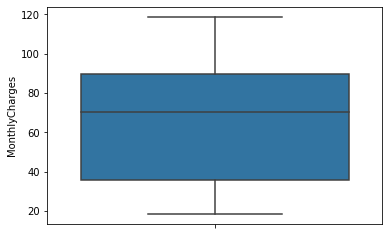

In [8]:
sns.boxplot(y='MonthlyCharges',data=df)

on the MonthlyCharges column there is no any outlier.

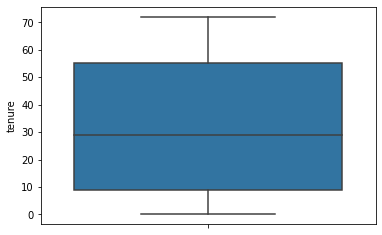

In [9]:
sns.boxplot(y='tenure',data=df)

also in the tenure there is no outlier detected.

let's calculate the minimum and maximum value of MonthlyCharges by using 
1. min=Q1-(IQR*1.5)
2. Max= Q3+(IQR*1.5)

In [10]:
Q1=np.percentile(df['MonthlyCharges'],25)
Q3=np.percentile(df['MonthlyCharges'],75)
IQR=Q3-Q1
min=Q1-(IQR*1.5)
max=Q3+(IQR*1.5)
print('lower limit value is',min)
print('upper limit value is',max)
print('minimum is',df['MonthlyCharges'].min())
print('maximum is',df['MonthlyCharges'].max())

lower limit value is -46.02499999999999
upper limit value is 171.375
minimum is 18.25
maximum is 118.75


We can say that in the MonthlyCharges column there is no any outliers.
because:
1. there is no data type that less than the lower limit.
2. there is no any data point above the upper limit. 
3. based on the boxplot

## Distribution

Distribution:
is for numerical values. to represent all the possible values and how they often occur.
we can use histogram with KDI.

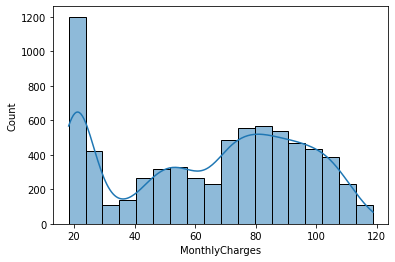

In [11]:
sns.histplot(x='MonthlyCharges',data=df,kde=True)

## Correlation

correlation: measure the relationship among numerical columns.

correlation measurment:
1. covariance
2. pearson's correlation coefficient
3. kendall : Kendall Tau correlation coefficient


In [16]:
df.corr(method ='pearson')

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


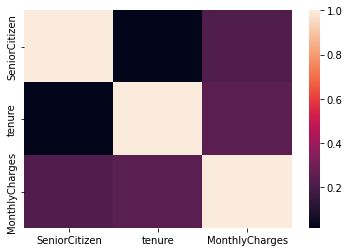

In [17]:
sns.heatmap(df.corr(method ='pearson'))

In [14]:
df.corr(method ='kendall')

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.015315,0.180636
tenure,0.015315,1.000000,0.190565
MonthlyCharges,0.180636,0.190565,1.000000
